In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

MAX_ROWS = 10
pd.set_option('display.max_rows', MAX_ROWS)
pd.set_option('display.max_columns', 200)
 
sns.set_style("whitegrid")
sns.set_context("paper")

In [2]:
path_dataset = 'dataset/datos_properati_limpios.csv'
df = pd.read_csv(path_dataset, parse_dates=['created_on'])

In [3]:
df.columns

Index(['created_on', 'operation', 'property_type', 'place_with_parent_names',
       'lat-lon', 'lat', 'lon', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'floor', 'rooms',
       'expenses', 'properati_url', 'barrio'],
      dtype='object')

In [4]:
print("El dataset que vamos a trabajar aquí tiene {} observaciones".format(df.shape[0]))

El dataset que vamos a trabajar aquí tiene 18979 observaciones


In [5]:
df["price_usd_per_m2"].describe()

count     16037.000000
mean       2760.408525
std        1940.153216
min           0.958333
25%        1984.126984
50%        2545.454545
75%        3162.790698
max      142450.141026
Name: price_usd_per_m2, dtype: float64

In [6]:
first_quartile, third_quartile = df['price_usd_per_m2'].quantile([0.25, 0.75])
iqr = third_quartile - first_quartile
df_filtered = df[~((df["price_usd_per_m2"] < (first_quartile - 1.5 * iqr)) |
                   (df["price_usd_per_m2"] > (third_quartile + 1.5 * iqr)))]

In [7]:
df_filtered["price_usd_per_m2"].describe()

count    15131.000000
mean      2528.832243
std        847.113710
min        239.726027
25%       1956.521739
50%       2500.000000
75%       3046.153846
max       4929.577465
Name: price_usd_per_m2, dtype: float64

In [8]:
df = df_filtered

In [9]:
total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
floor,15376,85.077187
expenses,14431,79.848393
rooms,5274,29.181652
price_usd_per_m2,2942,16.278426
surface_total_in_m2,2393,13.240746
...,...,...
lat-lon,0,0.000000
place_with_parent_names,0,0.000000
property_type,0,0.000000
operation,0,0.000000


In [10]:
df = df.drop(['floor', 'expenses'], axis = 1)

In [11]:
df.sample(10)

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,properati_url,barrio
16003,2017-10-20,sell,store,|Argentina|Capital Federal|Floresta|,"-34.6276212,-58.4815111",-34.627621,-58.481511,600000.0,NaN,100.0,NaN,NaN,https://www.properati.com.ar/1haif_venta_local...,FLORESTA
15908,2018-01-19,sell,apartment,|Argentina|Capital Federal|Villa del Parque|,"-34.612125,-58.47868",-34.612125,-58.478680,NaN,46.0,46.0,NaN,1.0,https://www.properati.com.ar/1jp3k_venta_depar...,VILLA SANTA RITA
18754,2017-12-14,sell,PH,|Argentina|Capital Federal|Coghlan|,"-34.5596435,-58.4778467",-34.559643,-58.477847,305000.0,150.0,76.0,2033.333333,3.0,https://www.properati.com.ar/1iz3m_venta_ph_co...,COGHLAN
9841,2017-11-10,sell,apartment,|Argentina|Capital Federal|Belgrano|,"-34.5692509,-58.4691294",-34.569251,-58.469129,420000.0,90.0,82.0,4666.666667,3.0,https://www.properati.com.ar/1i0rp_venta_depar...,BELGRANO
11116,2017-10-12,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.6086076,-58.4485151",-34.608608,-58.448515,375400.0,147.0,131.0,2553.741497,NaN,https://www.properati.com.ar/1g8y0_venta_depar...,CABALLITO
12051,2018-01-26,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.6294269,-58.4521176",-34.629427,-58.452118,145000.0,54.0,50.0,2685.185185,3.0,https://www.properati.com.ar/1k4xs_venta_depar...,CABALLITO
4257,2018-01-25,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5850740914,-58.4065106688",-34.585074,-58.406511,345000.0,75.0,69.0,4600.000000,3.0,https://www.properati.com.ar/1k3do_venta_depar...,RECOLETA
5595,2017-10-17,sell,apartment,|Argentina|Capital Federal|Monserrat|,"-34.6081016,-58.3709896",-34.608102,-58.370990,NaN,830.0,NaN,NaN,NaN,https://www.properati.com.ar/1gm9r_venta_depar...,MONSERRAT
1216,2017-11-25,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5794661,-58.4309237",-34.579466,-58.430924,243000.0,93.0,89.0,2612.903226,3.0,https://www.properati.com.ar/1igc5_venta_depar...,PALERMO
9637,2017-10-17,sell,apartment,|Argentina|Capital Federal|Belgrano|,"-34.5586015798,-58.4526075045",-34.558602,-58.452608,560000.0,310.0,240.0,1806.451613,NaN,https://www.properati.com.ar/1gf78_venta_depar...,BELGRANO


In [12]:
df["operation"].unique()

array(['sell'], dtype=object)

drop "operations," son tdas iguales y "lat-lon" ya es encuentran representadas 

In [13]:
df = df.drop(['operation', 'lat-lon'], axis = 1)

In [14]:
df

,created_on,property_type,place_with_parent_names,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,properati_url,barrio
2,2017-08-02,store,|Argentina|Capital Federal|Palermo|Palermo Soho|,-34.589723,-58.432566,343000.00,122.0,108.0,2811.475410,2.0,https://www.properati.com.ar/1cm8w_venta_local...,PALERMO
5,2017-08-09,store,|Argentina|Capital Federal|Palermo|,-34.575825,-58.434322,120000.00,30.0,30.0,4000.000000,NaN,https://www.properati.com.ar/1cw7a_venta_local...,PALERMO
6,2017-08-11,store,|Argentina|Capital Federal|Belgrano|,-34.573906,-58.439195,100000.00,26.0,NaN,3846.153846,NaN,https://www.properati.com.ar/1d36i_venta_local...,PALERMO
8,2017-08-12,store,|Argentina|Capital Federal|Palermo|,-34.595609,-58.424764,110000.00,48.0,48.0,2291.666667,NaN,https://www.properati.com.ar/1d5sl_venta_local...,PALERMO
9,2017-08-15,store,|Argentina|Capital Federal|Palermo|,-34.558031,-58.417009,50000.00,20.0,20.0,2500.000000,NaN,https://www.properati.com.ar/1d86m_venta_local...,PALERMO
...,...,...,...,...,...,...,...,...,...,...,...,...
18974,2018-01-08,apartment,|Argentina|Capital Federal|Villa Soldati|,-34.668741,-58.443146,60000.00,55.0,55.0,1090.909091,3.0,https://www.properati.com.ar/1jcpm_venta_depar...,VILLA SOLDATI
18975,2018-01-23,house,|Argentina|Capital Federal|Villa Soldati|,-34.664170,-58.443317,99000.00,115.0,82.0,860.869565,3.0,https://www.properati.com.ar/1k1hs_venta_casa_...,VILLA SOLDATI
18976,2018-01-24,store,|Argentina|Capital Federal|Villa Soldati|,-34.661814,-58.426504,3300000.00,NaN,4162.0,NaN,NaN,https://www.properati.com.ar/1k1mv_venta_local...,VILLA SOLDATI
18977,2018-01-27,apartment,|Argentina|Capital Federal|Villa Soldati|,-34.665005,-58.443041,50433.01,45.0,45.0,1120.733556,3.0,https://www.properati.com.ar/1k5v0_venta_depar...,VILLA SOLDATI


Existen lugares con expacio extra a expandir, quizas patio o algun otro espacio

In [15]:
df["extra_space"] = df["surface_total_in_m2"] - df["surface_covered_in_m2"]

In [29]:
def hasExtraSpace(x):
    if x["extra_space"] == 0:
        x["has_extra_space"] = 0
    else:
        x["has_extra_space"] = 1

In [31]:
df["has_extra_space"] = df["extra_space"] != 0

In [ ]:
df

In [16]:
df_houseExtra = df[(df["extra_space"] < 0) & (df["property_type"] == "house")]

In [43]:
df_houseExtra.shape

(42, 13)

/home/rodixxi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


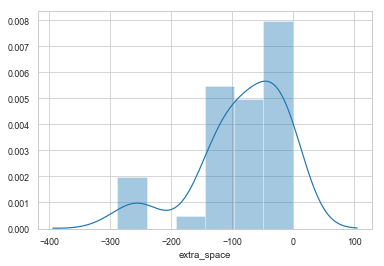

In [21]:
ax = sns.distplot(df_houseExtra["extra_space"])

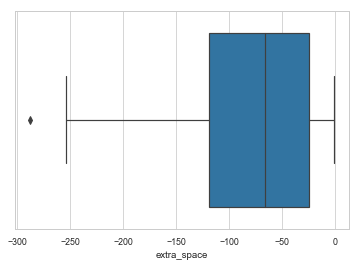

In [22]:
ax = sns.boxplot(x=df_houseExtra["extra_space"])

In [20]:
df_notHouseExtra = df[(df["extra_space"] < 0) & ~(df["property_type"] == "house")]

In [34]:
df_notHouseExtra.shape

(68, 13)

/home/rodixxi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


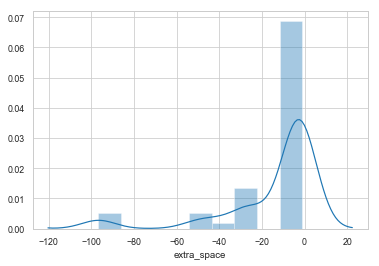

In [54]:
ax = sns.distplot(df_notHouseExtra[df_notHouseExtra["extra_space"] > -100]["extra_space"])

In [50]:
df_notHouseExtra[df_notHouseExtra["extra_space"] < -1000]["extra_space"]

1176      -628.0
1547     -4506.0
4961      -262.0
6519     -7395.0
9219    -22220.0
          ...   
14428    -4387.0
14871     -135.0
15860     -214.0
16546     -148.0
17670     -166.0
Name: extra_space, Length: 11, dtype: float64

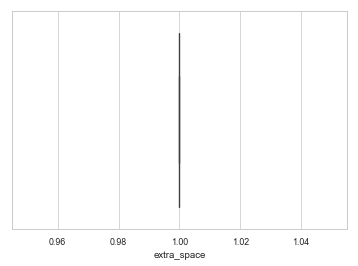

In [36]:
ax = sns.boxplot(x=df_notHouseExtra["extra_space"] < 5000)